<a href="https://colab.research.google.com/github/paascorb/TrabajoAAI/blob/main/TrabajoAAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Aprendizaje Automático I

En estre trabajo se va a intentar pasar por todos los contenidos vistos en la asignatura referente al apartado de aprendizaje no supervisado. Los datos utilizados han sido proporcionados por Vicente Marco del Departamento de Agricultura y Alimentación.

En estos datos encontramos, para una serie de biomas o habitats, cuántos insectos y arañas han sido encontrados. Estos animales están diferenciados por su orden.
Como son datos de un proyecto real, y en principio no han sido tratados, parece interesante ver si son datos válidos para la naturaleza de este trabajo y si se puede hacer clustering con ellos.

# 1. Datos BioDiVine 2011

## Tratamiento de datos

Este apartado no toca los temas más importantes de la asignatura, pero es necesario hacerlo y parece interesante realizarlo por mayor completitud.

Primero importamos todos los CSV, en este caso hay 20, 2 para cada tipo de trampa (Combi o Pitfall), y en cada trampa 10 semanas. En este caso diferenciar por trampas o semanas parece agregar complejidad, así que vamos a aunar todo en un solo dataset.

In [17]:
import pandas as pd
import numpy as np
from functools import reduce

#Combi:
df = []
for i in range(1, 11):
  df.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
#Pitfall:
for i in range(1, 11):
  df.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:].iloc[:, :-1])
df = reduce(lambda a, b: a.add(b, fill_value=0), df)
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,5.0,1.0,4.0,2.0,5.0,3.0,4.0,2.0,2.0,0.0,...,3.0,1.0,3.0,2.0,2.0,7.0,1.0,2.0,3.0,2.0
1,2.0,6.0,2.0,3.0,0.0,6.0,8.0,2.0,5.0,3.0,...,2.0,2.0,1.0,4.0,5.0,4.0,2.0,2.0,1.0,4.0
2,4.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,0.0,0.0,4.0,4.0,6.0,0.0,1.0
3,5.0,10.0,4.0,0.0,13.0,34.0,148.0,15.0,7.0,1.0,...,4.0,6.0,6.0,3.0,3.0,2.0,0.0,4.0,0.0,2.0
4,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0


Ya tenemos nuestro dataset. Las 25 columnas representan los habitats de la siguiente manera:
 - 1-5: Olivo
 - 6-10: Pradera
 - 11-15: Viñedo
 - 16-20: Maquia Mediterránea
 - 21-25: Bosque Mediterráneo

In [18]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,5.458182,5.841818,4.229091,3.916364,2.930909,3.445455,3.900000,4.201818,6.043636,11.856364,...,5.574545,4.627273,4.480000,2.789091,3.610909,10.290909,8.400000,12.485455,4.145455,3.269091
std,22.413750,21.463708,16.630624,13.564805,9.352573,11.110790,12.892543,14.027075,21.201134,172.301562,...,23.848965,17.413465,19.302655,11.761870,17.804685,159.110171,50.241928,90.674696,17.207846,13.427548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,315.000000,235.000000,149.000000,133.000000,87.000000,118.000000,148.000000,174.000000,279.000000,4028.000000,...,418.000000,204.000000,222.000000,154.000000,334.000000,3716.000000,890.000000,1496.000000,230.000000,203.000000


Podemos comprobar, gracias a estos estadísticos, que hay muchisíma dispersión en general. Y que las diferencias entre media y mediana son enormes. Eso es que que casi todos los datos están a cero. Pero eso ya lo sabiamos porque es una matriz con muchos huecos.

Vamos a ver relaciones entre columnas:

In [19]:
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
1,1.000000,0.860128,0.845022,0.711330,0.660864,0.759668,0.547621,0.594224,0.573598,0.638716,0.687054,0.705977,0.775910,0.758064,0.737655,0.541919,0.658270,0.580376,0.685746,0.875068,0.138133,0.519637,0.327214,0.583047,0.660979
2,0.860128,1.000000,0.855827,0.813396,0.724284,0.848355,0.655352,0.632047,0.567088,0.291372,0.694207,0.758759,0.763734,0.792025,0.745392,0.539715,0.690889,0.714024,0.728528,0.605993,0.088298,0.386820,0.282345,0.595629,0.747358
3,0.845022,0.855827,1.000000,0.760080,0.729219,0.849020,0.590669,0.587667,0.532665,0.359609,0.796936,0.821336,0.740949,0.813943,0.714503,0.492214,0.663563,0.649394,0.674520,0.640057,0.053141,0.379355,0.391605,0.588600,0.699989
4,0.711330,0.813396,0.760080,1.000000,0.719128,0.825877,0.596556,0.588731,0.550750,0.097946,0.785652,0.780873,0.710897,0.798145,0.807525,0.578454,0.742692,0.680767,0.727984,0.486905,0.130136,0.354832,0.325334,0.600100,0.752174
5,0.660864,0.724284,0.729219,0.719128,1.000000,0.712543,0.593650,0.585032,0.501336,0.134487,0.664340,0.656914,0.698679,0.764444,0.699164,0.543574,0.665356,0.557500,0.681530,0.467759,0.173271,0.398899,0.356176,0.585815,0.664015
6,0.759668,0.848355,0.849020,0.825877,0.712543,1.000000,0.693120,0.633332,0.548133,0.185644,0.775221,0.776829,0.739060,0.802548,0.762203,0.590896,0.746790,0.709516,0.757647,0.542895,0.130089,0.394751,0.362054,0.654175,0.782120
7,0.547621,0.655352,0.590669,0.596556,0.593650,0.693120,1.000000,0.539757,0.435197,0.088509,0.540540,0.551700,0.533289,0.611070,0.569223,0.544922,0.618157,0.560123,0.573334,0.390660,0.249918,0.394887,0.330975,0.554380,0.598639
8,0.594224,0.632047,0.587667,0.588731,0.585032,0.633332,0.539757,1.000000,0.842020,0.184948,0.559113,0.600151,0.661647,0.697010,0.669892,0.593105,0.670531,0.556975,0.707185,0.501316,0.239628,0.453489,0.363776,0.617799,0.678507
9,0.573598,0.567088,0.532665,0.550750,0.501336,0.548133,0.435197,0.842020,1.000000,0.260198,0.541153,0.613092,0.652658,0.594708,0.631808,0.525322,0.621444,0.473738,0.585100,0.508885,0.222820,0.397819,0.256599,0.531828,0.607724
10,0.638716,0.291372,0.359609,0.097946,0.134487,0.185644,0.088509,0.184948,0.260198,1.000000,0.141597,0.173637,0.379524,0.185254,0.180417,0.077487,0.093893,0.080018,0.103289,0.825707,0.023859,0.332990,0.170454,0.106557,0.081463


Vemos que algunos habitats coinciden con sus cinco filas en la correlación, pero otros parecen no tener ningúna relación. Quizá con más datos se verían esos bloques de 5 en 5 en la diagonal.

Quizá para simplificar más, podemos agrupar los distintos habitats, y de esta forma tener solo 5 columnas:

In [20]:
df['01'] = df['1'] + df['2'] + df['3']+ df['4'] + df['5']
df['02'] = df['6'] + df['7'] + df['8']+ df['9'] + df['10']
df['03'] = df['11'] + df['12'] + df['13']+ df['14'] + df['15']
df['04'] = df['16'] + df['17'] + df['18']+ df['19'] + df['20']
df['05'] = df['21'] + df['22'] + df['23']+ df['24'] + df['25']
df = df.iloc[: , 25:]
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
545,20.0,35.0,71.0,17.0,5.0
546,2.0,0.0,8.0,14.0,1.0
547,2.0,1.0,9.0,0.0,0.0
548,0.0,1.0,0.0,0.0,0.0


Veamos ahora las correlaciones:

In [21]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,01,02,03,04,05
01,1.000000,0.558621,0.894738,0.824740,0.341004
02,0.558621,1.000000,0.428257,0.464688,0.237034
03,0.894738,0.428257,1.000000,0.830153,0.353216
04,0.824740,0.464688,0.830153,1.000000,0.703101
05,0.341004,0.237034,0.353216,0.703101,1.000000


## Tendencia de clustering

Primero, para ver si tiene sentido hacer clústering vamos evaluarlo con el estadístico de Hopkins y el método VAT.

In [22]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from pyclustertend import hopkins, vat

hopkins(df,550)

0.01695950495957905

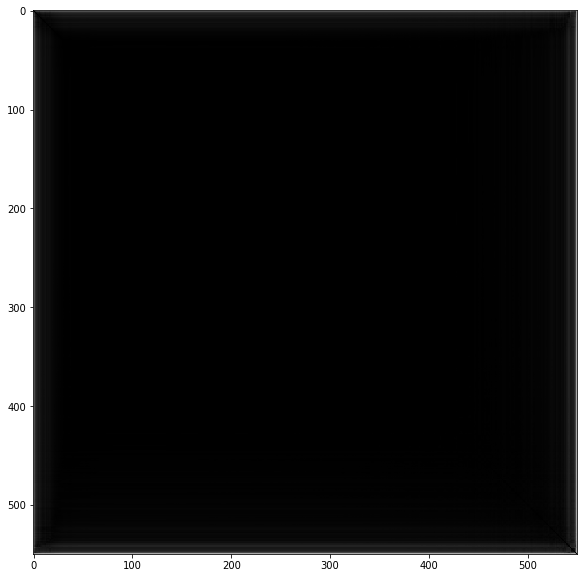

In [24]:
vat(df)

Vamos a visualizar el Olivo y la padrera:

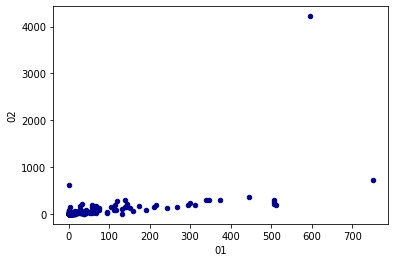

In [25]:
 df.plot.scatter(x='01', y='02', c='DarkBlue')

Realmente no parecería interesante hacer clustering con estos datos. No tiene pinta que podamos diferenciar cada fila (un tipo de insecto o araña) con el número de veces que se encontró en un habitat dentro de grupos diferenciados.

Pero aún así vamos a continuar un poco para ver qué nos dicen los métodos.

## KMeans

Como son 24 grupos de insectos distintos vamos a poner inicialmente k = 24.

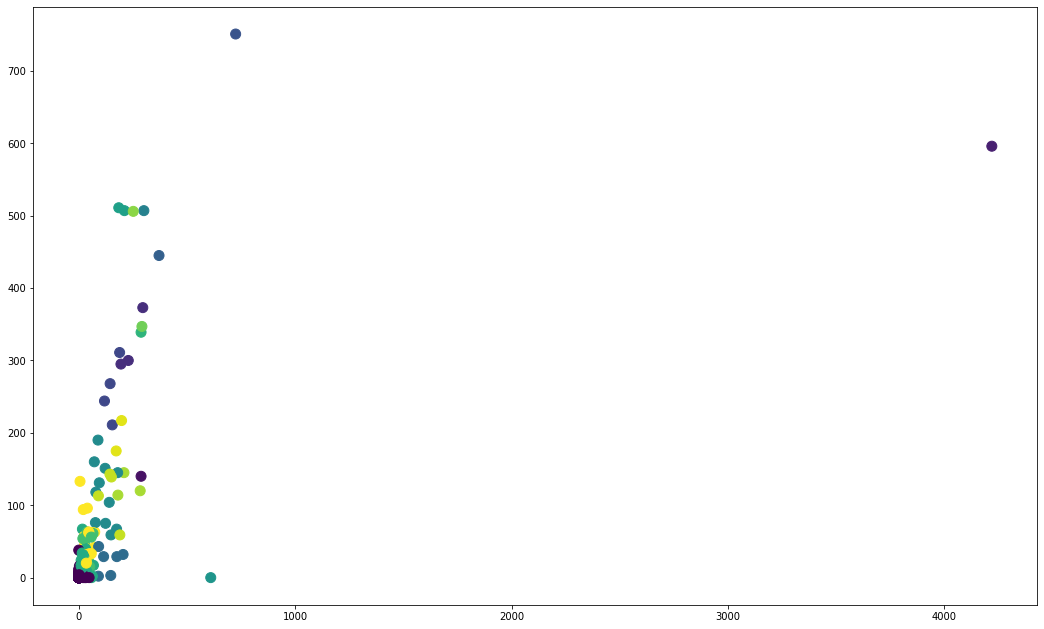

In [26]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Con esto no podemos scar ninguna conclusión, veamos si proyectamos a 2 dimensiones:

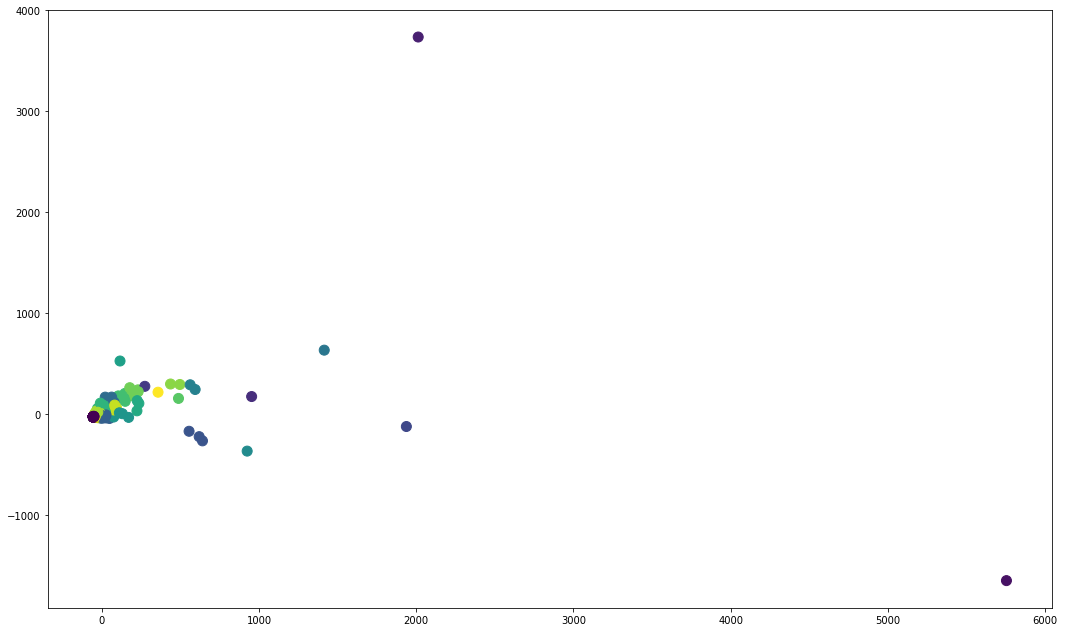

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Podemos ver también que hay una serie de datos "extremos" que hacen que el resto se distorsione un poco. Vamos a ver que pasa si eliminamos estos datos:

In [28]:
df_pca.describe()

,1,2
count,550.000000,5.500000e+02
mean,0.000000,4.960880e-15
std,298.938835,1.862752e+02
min,-53.309412,-1.644596e+03
25%,-52.669497,-2.295605e+01
50%,-50.613005,-2.104787e+01
75%,-38.740734,-1.455382e+01
max,5753.168321,3.735764e+03


Con esto y el grafico anterior vemos que todos los que tengan en la primera componente más de 900 son demasiado extremos, vamos a eliminarlos.

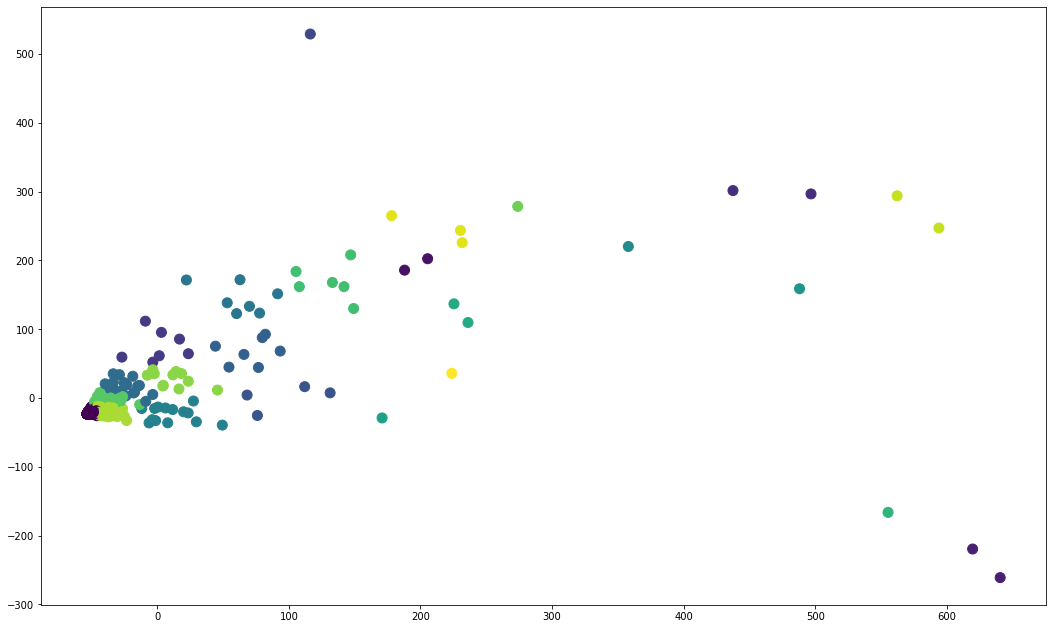

In [29]:
df_pca2 = df_pca.loc[df_pca['1'] <= 900]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca2)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca2['1'], df_pca2['2'], c=kmeans.labels_, s=100)
plt.show()

Ahora podemos verlo mejor, pero sigen estando muy dispersos. Reduzcamos a 0.

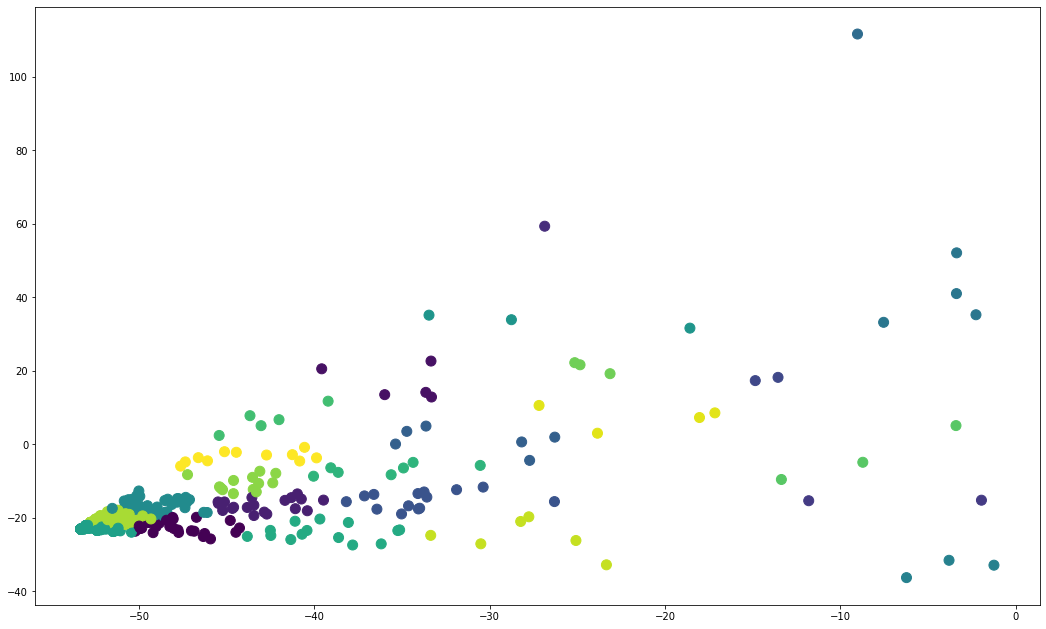

In [30]:
df_pca3 = df_pca.loc[df_pca['1'] <= 0]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca3)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca3['1'], df_pca3['2'], c=kmeans.labels_, s=100)
plt.show()

Va cogiendo forma, pero aún así, siguen con cierta dispersión. Reduzcamos a -50.

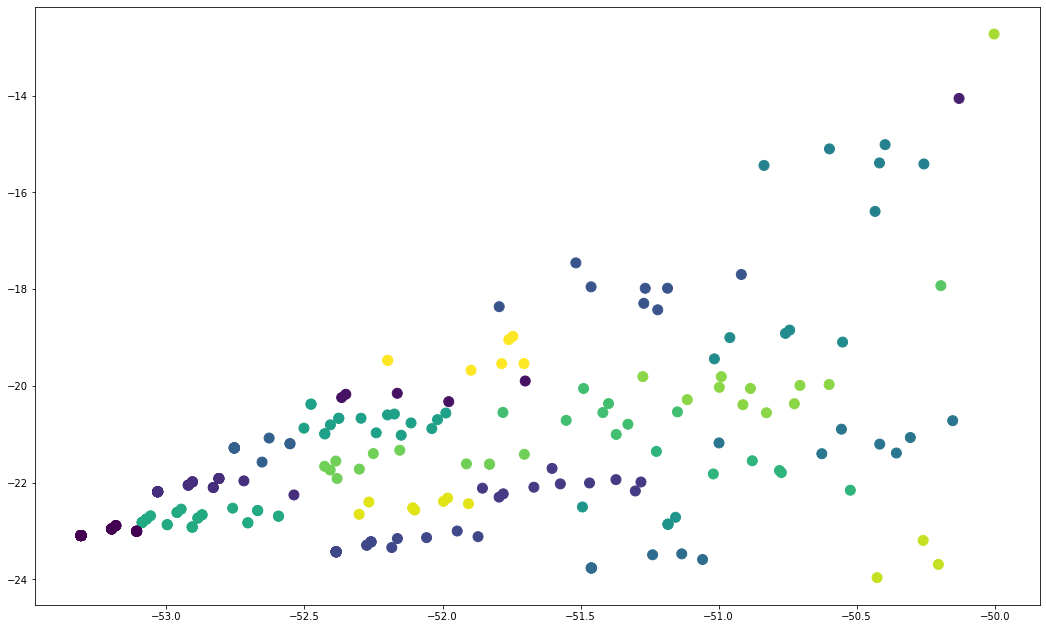

In [31]:
df_pca4 = df_pca.loc[df_pca['1'] <= -50]

kmeans = KMeans(n_clusters = 24, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca4)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca4['1'], df_pca4['2'], c=kmeans.labels_, s=100)
plt.show()

Realmente no parece que estos grupos sean muy significativos. Pero recordemos que hemos proyectado y eliminado todos los que estaban por encima de -50.

Volviendo a nuestro dataset, aunque nos sea muy complicado visualizarlo o comprobar si tenemos buenos resultados, vamos a aplicar los críterios internos para comprobar esto último. Pero antes apliquemos el método del codo para comprobar el k óptimo.

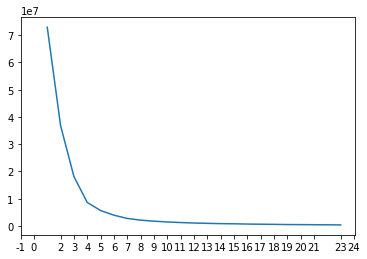

In [32]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Segun lo que vemos aquí es mejor hacer 4 grupos, vamos a ver los resultados anteriores con este valor.

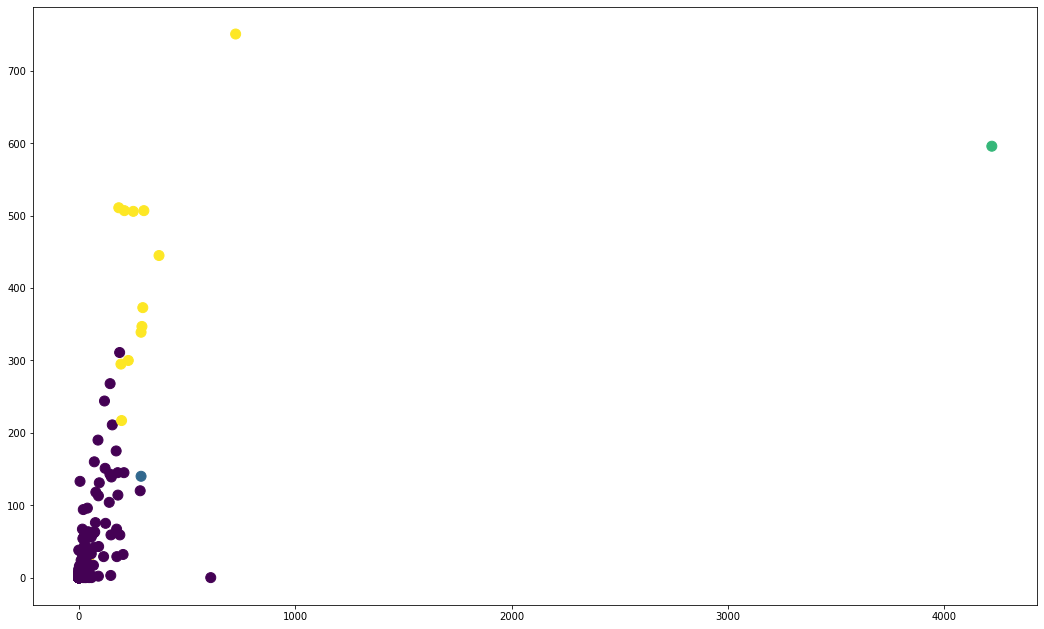

In [33]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Parece que encuentra dos grandes grupos y dos espurios. Veamos quienes son esos dos espurios y los eliminamos, así tendríamos 2 grupos diferenciados, que tiene sentido, porque podrían ser las arañas y los insectos.

In [34]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
aux1 = kmeans.labels_ == 0
aux2 = kmeans.labels_ == 3
df = df[aux1 | aux2]
df.reset_index(inplace=True, drop=True)
df

,01,02,03,04,05
0,17.0,11.0,15.0,11.0,15.0
1,13.0,24.0,18.0,14.0,13.0
2,8.0,7.0,6.0,4.0,15.0
3,32.0,205.0,24.0,22.0,8.0
4,4.0,3.0,2.0,5.0,0.0
...,...,...,...,...,...
543,20.0,35.0,71.0,17.0,5.0
544,2.0,0.0,8.0,14.0,1.0
545,2.0,1.0,9.0,0.0,0.0
546,0.0,1.0,0.0,0.0,0.0


Volvemos a aplicar el método del codo:

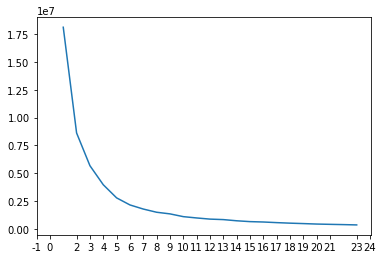

In [36]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Efectivamente ahora nos indica k=2.

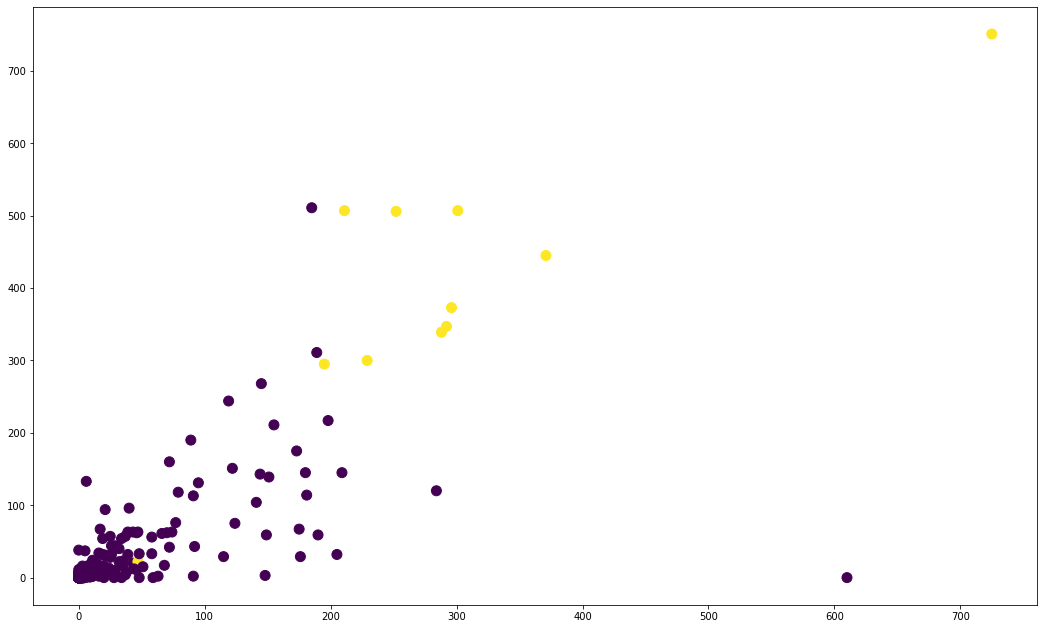

In [37]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Ahora parece que tiene algo más de sentido, el clustering. Y los grupos se ven algo más diferenciados.

Vamos a ver si proyectamos de nuevo como queda:

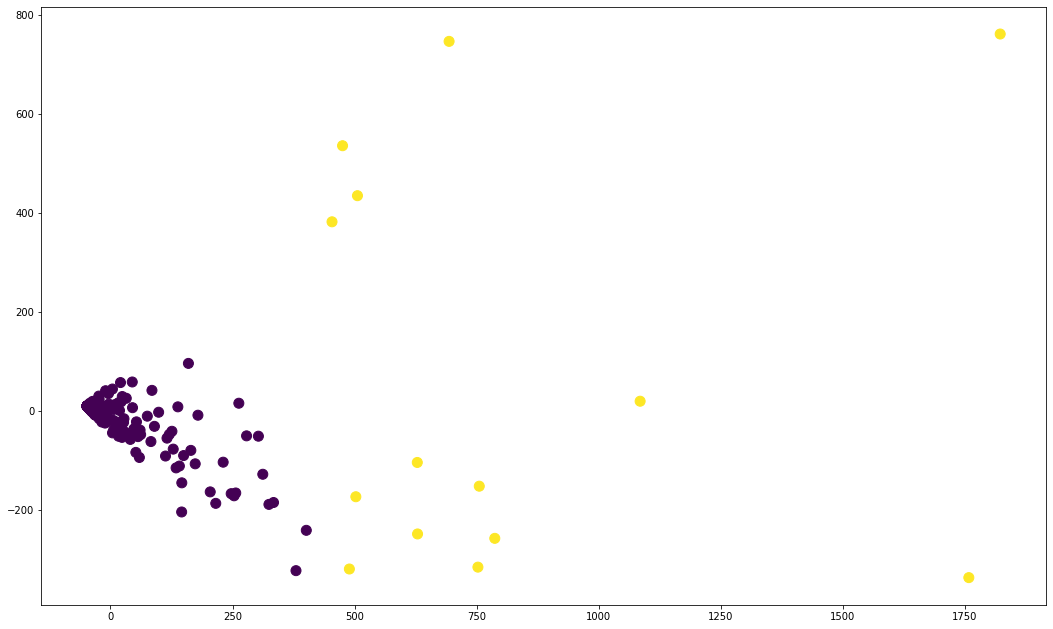

In [38]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Los resultados parecen más verosímiles. Hay un grupo muy disperso y otro más compacto. Pero parece que podemos diferenciar entre estos grupos.

Aplicamos criterios internos:

In [39]:
from sklearn import metrics

#Sacado del notebook tema4_02_CriteriosInternos.ipynb
print("Medidas internas para k-means con k=2:")
ss = metrics.silhouette_score(df, y_kmeans, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_kmeans)
db = metrics.davies_bouldin_score(df, y_kmeans)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para k-means con k=2:
Coef. de silueta: 0.9138723154317658
Coef. de Calinski-Harabasz: 602.6930707574786
Coef. de Davies-Bouldin: 0.6969617765072189


No salen valores exageradamente buenos, pero tampoco son para nada malos.

Aplicamos criterios externos:

Como sabemos a qué orden pertenece cada instancia. Vamos a agrupar en dos grandes grupos, insectos y arañas y comprobar a si los dos grupos obtenidos se corresponden con esto o siguen otra agrupación.

In [40]:
etiquetas = pd.read_csv('Etiquetas.csv', delimiter=';')
etiquetas.head(5)

,ID,Order,Clase
0,AR,Araneida,Arachnida
1,AC,Acari,Arachnida
2,BL,Blattaria,Insecta
3,CO,Coleoptera,Insecta
4,COL,Collembola,Insecta


In [41]:
#Volvemos a cargar los datos, para quedarnos con la primera columna que nos indica el orden
#para así relacionarlo con la clase a la que pertenecen.
df_et = []
for i in range(1, 11):
  df_et.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
  df_et.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
ids = df_et[0]['Morphotypes']
aux = []
for i in df_et:
  aux.append(i.iloc[:,1:])
df_et = aux
df_et = reduce(lambda a, b: a.add(b, fill_value=0), df_et)
df_et['ID'] = ids
df_et['01'] = df_et['1'] + df_et['2'] + df_et['3']+ df_et['4'] + df_et['5']
df_et['02'] = df_et['6'] + df_et['7'] + df_et['8']+ df_et['9'] + df_et['10']
df_et['03'] = df_et['11'] + df_et['12'] + df_et['13']+ df_et['14'] + df_et['15']
df_et['04'] = df_et['16'] + df_et['17'] + df_et['18']+ df_et['19'] + df_et['20']
df_et['05'] = df_et['21'] + df_et['22'] + df_et['23']+ df_et['24'] + df_et['25']
df_et = df_et.iloc[: , 25:]
df_et.head(5)

,ID,01,02,03,04,05
0,AR.01,17.0,11.0,15.0,11.0,15.0
1,AR.02,13.0,24.0,18.0,14.0,13.0
2,AR.03,8.0,7.0,6.0,4.0,15.0
3,AR.04,32.0,205.0,24.0,22.0,8.0
4,AR.05,4.0,3.0,2.0,5.0,0.0


In [42]:
#Ahora necesitamos sacar la lista de códigos sin los números:
df_et['ID'] = df_et['ID'].str.split('.').str[0]
df_et
#Y ahora, dependiendo de qué codigo tenga necesitamos saber si es insecto o araña:
df_et = df_et.join(etiquetas.set_index('ID'), on='ID').drop('Order', axis=1)

In [43]:
df_et.Clase[df_et.Clase == 'Arachnida'] = 1
df_et.Clase[df_et.Clase == 'Insecta'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
#Recordemos que habíamos eliminado dos espurios, vamos a eliminarlos aquí también:
df_et = df_et[aux1 | aux2]
df_et.reset_index(inplace=True, drop=True)
df_et

,ID,01,02,03,04,05,Clase
0,AR,17.0,11.0,15.0,11.0,15.0,1
1,AR,13.0,24.0,18.0,14.0,13.0,1
2,AR,8.0,7.0,6.0,4.0,15.0,1
3,AR,32.0,205.0,24.0,22.0,8.0,1
4,AR,4.0,3.0,2.0,5.0,0.0,1
...,...,...,...,...,...,...,...
543,TH,20.0,35.0,71.0,17.0,5.0,0
544,TH,2.0,0.0,8.0,14.0,1.0,0
545,TH,2.0,1.0,9.0,0.0,0.0,0
546,TH,0.0,1.0,0.0,0.0,0.0,0


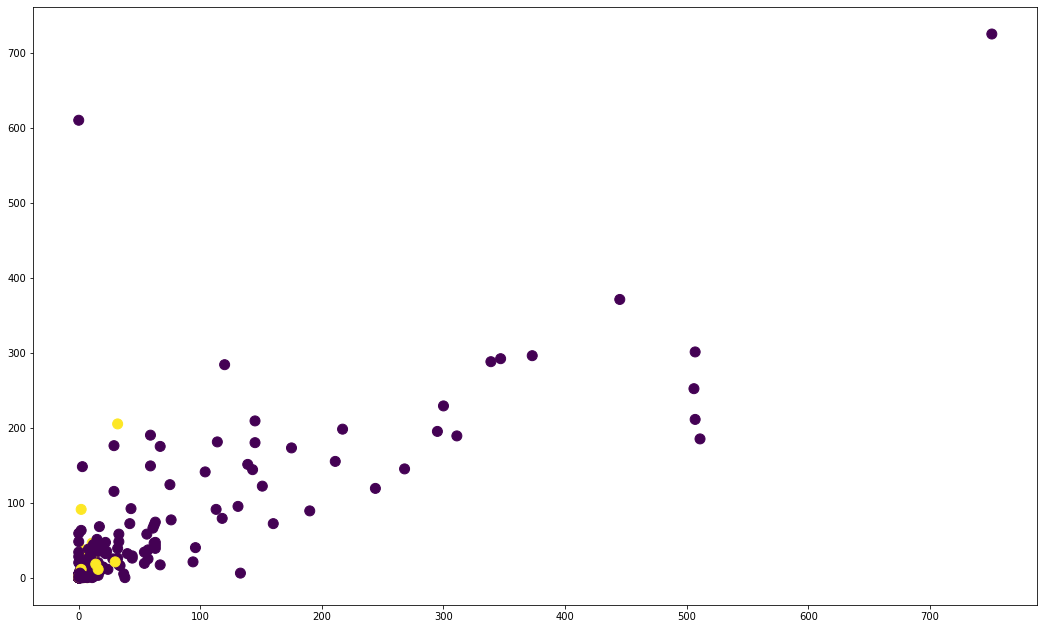

In [45]:
#Vemos los datos, para comprobar que todo está correcto:
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_et['01'], df_et['02'], c=df_et['Clase'], s=100)
plt.show()

Parece el mismo data set. Ahora vamos a aplicar los criterios externos:

In [46]:
labels = df_et['Clase'].fillna(0).values

#Sacado del cuaderno 'tema4_03_CriteriosExternos.ipynb'
print("Medidas externas para k-means con k=2:")
ars = metrics.adjusted_rand_score(labels, y_kmeans)
fms = metrics.fowlkes_mallows_score(labels, y_kmeans)
vm = metrics.v_measure_score(labels, y_kmeans)
ami = metrics.adjusted_mutual_info_score(labels, y_kmeans)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))

Medidas externas para k-means con k=2:
Índice de Rand ajustado: -0.036265698566642565
Índice de Falkes-Mallow: 0.8860331998056544
V-medida: 0.01167846542883544
AMI: 0.006656027313155585


Ya vemos que no estamos consiguiendo grupos separando las clases taxonómicas.

Puede que los grupos obtenidos sean por otra causa, pero se escapa del alcance de este trabajo.

## Otros Algoritmos

Ahora vamos a probar con estos datos un par de algoritmos no se han logrado ver en clase y comprobar qué tal funcionan.

### OPTICS

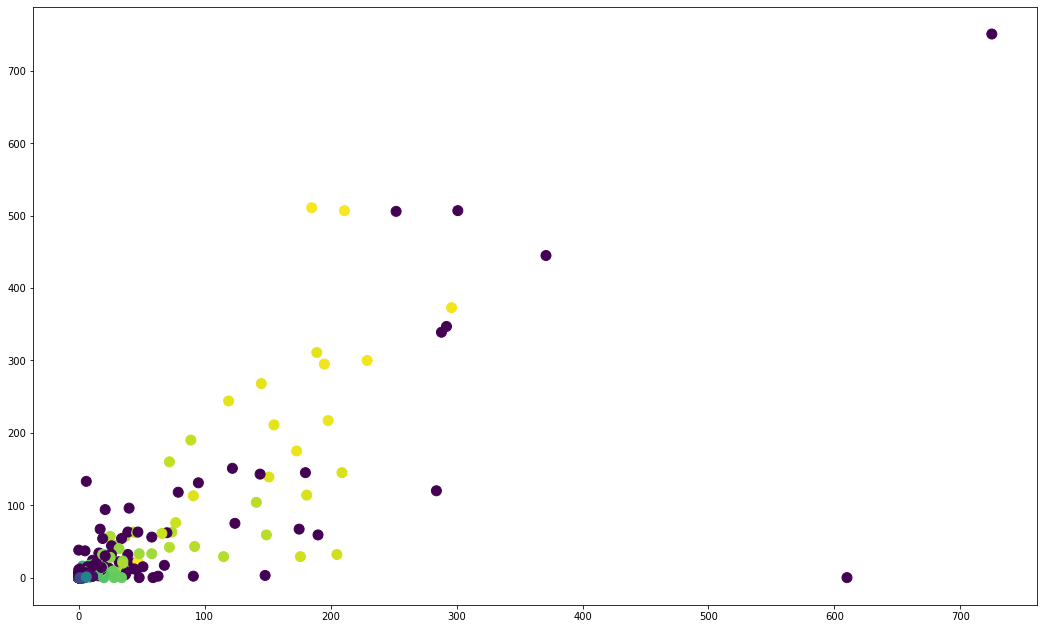

In [ ]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=2).fit(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

Como no podemos ver bien qué grupos crea o si tienen sentido vamos a ir iterar para determinar el mejor valor del hiperparámetro 'min_samples'.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

silu = []
for i in range(2, 30):
  silu.append((metrics.silhouette_score(df, OPTICS(min_samples=i).fit(df).labels_, metric='euclidean'),i))

In [ ]:
print(max(silu))

(0.1170148346574632, 2)


Vemos que ya habiamos cogido el máximo que es 'min_samples' = 2, vamos a ver qué tal los criterios internos:


(Los externos no los vemos porque como se muestra acontinuación nos hace muchos más grupos que nuestros dos iniciales).

In [ ]:
clustering = OPTICS(min_samples=2).fit(df)
y_label = clustering.labels_

#¿Cuantos grupos encuentra?
print(max(clustering.labels_))
#Criterios internos:
print("Medidas internas para OPTICS con min_samples=2:")
ss = metrics.silhouette_score(df, y_label, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_label)
db = metrics.davies_bouldin_score(df, y_label)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

97
Medidas internas para OPTICS con min_samples=2:
Coef. de silueta: 0.1170148346574632
Coef. de Calinski-Harabasz: 2.378159705432864
Coef. de Davies-Bouldin: 1.7458104295299286


No son buenos resultados.

###Spectral Clustering

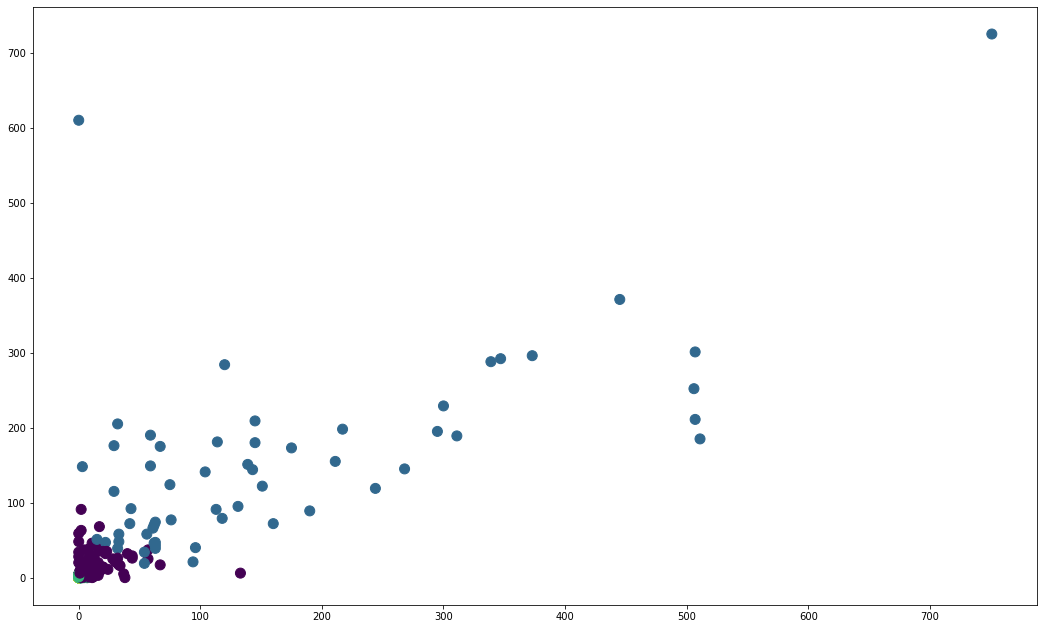

In [51]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=4, affinity ='nearest_neighbors').fit(df)
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['01'], df['02'], c=clustering.labels_, s=100)
plt.show()

In [52]:
clustering = SpectralClustering(n_clusters=4, affinity ='nearest_neighbors').fit(df)
y_label = clustering.labels_

#Criterios internos:
print("Medidas internas para SpectralClustering con min_samples=4:")
ss = metrics.silhouette_score(df, y_label, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, y_label)
db = metrics.davies_bouldin_score(df, y_label)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

3
Medidas internas para SpectralClustering con min_samples=4:
Coef. de silueta: -0.1472043059167173
Coef. de Calinski-Harabasz: 100.91164765676626
Coef. de Davies-Bouldin: 1.2230012782615913


In [53]:
print("Medidas externas para SpectralClustering con k=4:")
ars = metrics.adjusted_rand_score(labels, y_label)
fms = metrics.fowlkes_mallows_score(labels, y_label)
vm = metrics.v_measure_score(labels, y_label)
ami = metrics.adjusted_mutual_info_score(labels, y_label)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))

Medidas externas para SpectralClustering con k=4:
Índice de Rand ajustado: -0.01807120283442889
Índice de Falkes-Mallow: 0.5158565971236104
V-medida: 0.012291602942207857
AMI: 0.008592006437612643


## Conclusión:

Vistos estos resultados no podemos sacar nada en claro, y como hemos simplificado mucho el problema puede que sea porque no tenemos columnas relevantes. Así que para finalizar con esta primera parte, vamos a añadir las columnas de en qué trampa fueron encontrados cada espécimen y en qué semana lo hicieron:

In [ ]:
#Vamos a añadir dos columnas para cada trampa y diez más para cada semana:
df = []
for i in range(1, 11):

  sem = ''
  if i != 10:
    sem = 'S0'+str(i)
  else:
    sem = 'S'+str(i)

  comb = pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1 , 1:]
  aux = comb.TOTAL == 0
  aux = aux.astype(int)
  comb['Comb'] = aux
  comb[sem] = aux
  df.append(comb)
  pit = pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, 1:]
  aux = pit.TOTAL == 0
  aux = aux.astype(int)
  pit['Pit'] = aux
  pit[sem] = aux
  df.append(pit)
df = reduce(lambda a, b: a.add(b, fill_value=0), df)
df.S01[df.S01 > 0] = 1
df.S02[df.S02 > 0] = 1
df.S03[df.S03 > 0] = 1
df.S04[df.S04 > 0] = 1
df.S05[df.S05 > 0] = 1
df.S06[df.S06 > 0] = 1
df.S07[df.S07 > 0] = 1
df.S08[df.S08 > 0] = 1
df.S09[df.S09 > 0] = 1
df.S10[df.S10 > 0] = 1
df.Comb[df.Comb > 0] = 1
df.Pit[df.Pit > 0] = 1
df['01'] = df['1'] + df['2'] + df['3']+ df['4'] + df['5']
df['02'] = df['6'] + df['7'] + df['8']+ df['9'] + df['10']
df['03'] = df['11'] + df['12'] + df['13']+ df['14'] + df['15']
df['04'] = df['16'] + df['17'] + df['18']+ df['19'] + df['20']
df['05'] = df['21'] + df['22'] + df['23']+ df['24'] + df['25']
df = df.iloc[: , 25:]
df
df.head(5)

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,69,17.0,11.0,15.0,11.0,15.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,82,13.0,24.0,18.0,14.0,13.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,40,8.0,7.0,6.0,4.0,15.0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,291,32.0,205.0,24.0,22.0,8.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14,4.0,3.0,2.0,5.0,0.0


Comprobemos ahora con KMeans y el método del codo qué k usar:

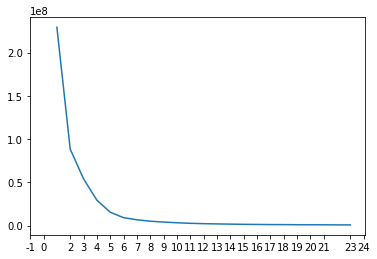

In [ ]:
inercias = []
for i in range(1, 24):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,24), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 24, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

Parece que k debería ser dos, vamos a probar:

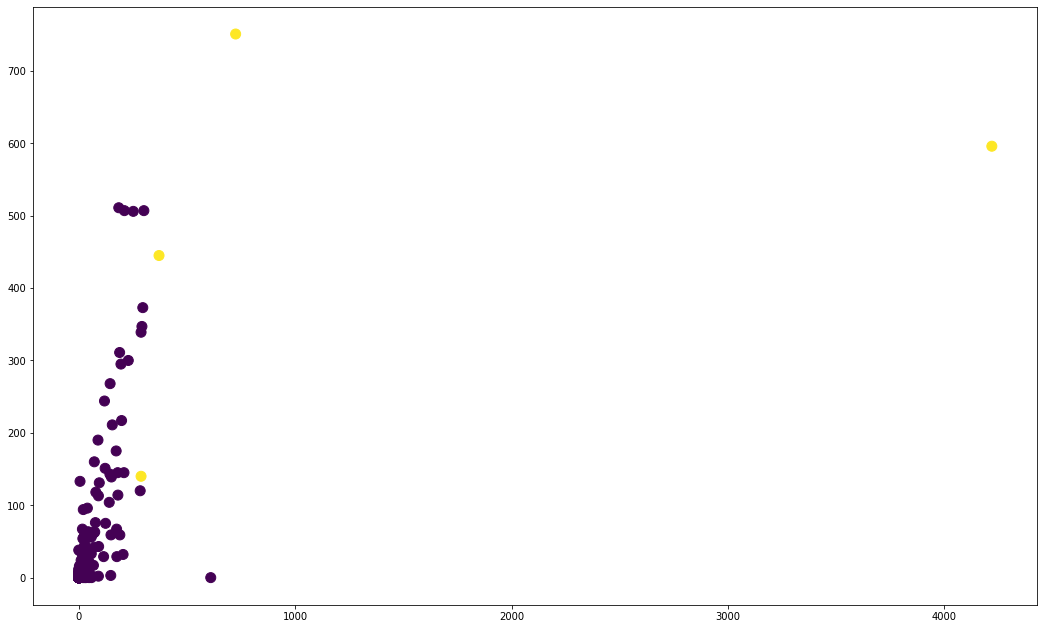

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

Vamos a ver eliminando los espurios:

In [ ]:
df = df[aux1 | aux2]
df.reset_index(inplace=True, drop=True)

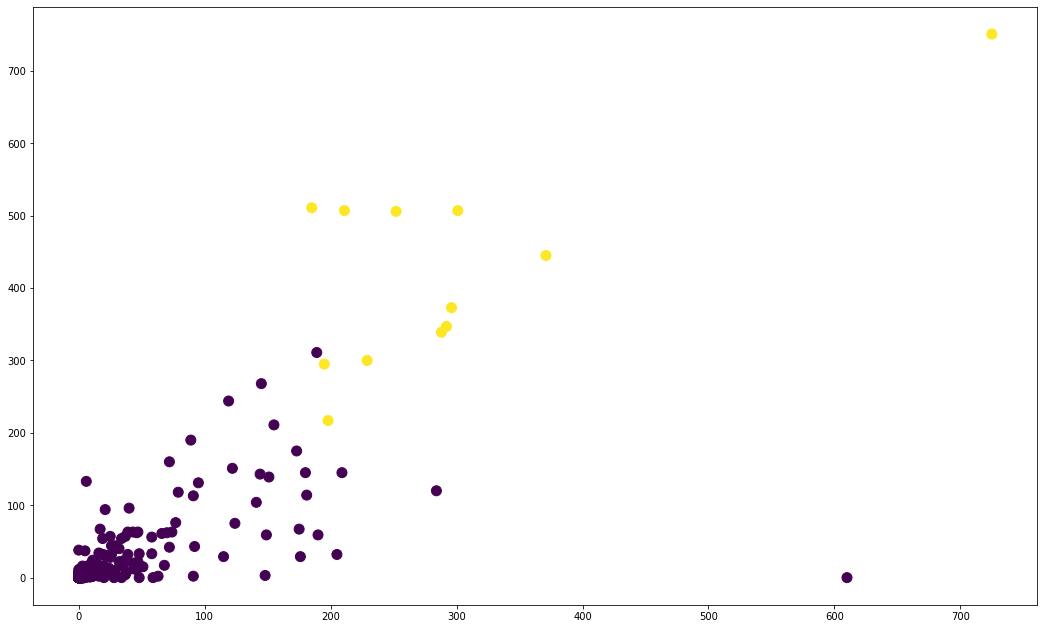

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=kmeans.labels_, s=100)
plt.show()

In [ ]:
df.describe()

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.939781,0.987226,0.937956,0.910584,0.908759,0.937956,0.941606,0.916058,0.921533,0.947080,0.936131,0.921533,107.302920,21.114964,21.330292,20.917883,18.885036,26.432482
std,0.238109,0.112399,0.241455,0.285604,0.288214,0.241455,0.234702,0.277554,0.269151,0.224078,0.244742,0.269151,346.598282,72.102301,62.979019,67.809407,64.979898,123.068481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,7.000000,10.000000,8.000000,8.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4097.000000,751.000000,725.000000,780.000000,852.000000,1842.000000


Los resultados si que son ligeramente diferentes, pero tampoco realmente interesantes. Vamos a probar a proyectar en dos dimensiones a ver si ha habido un cambio significativo:

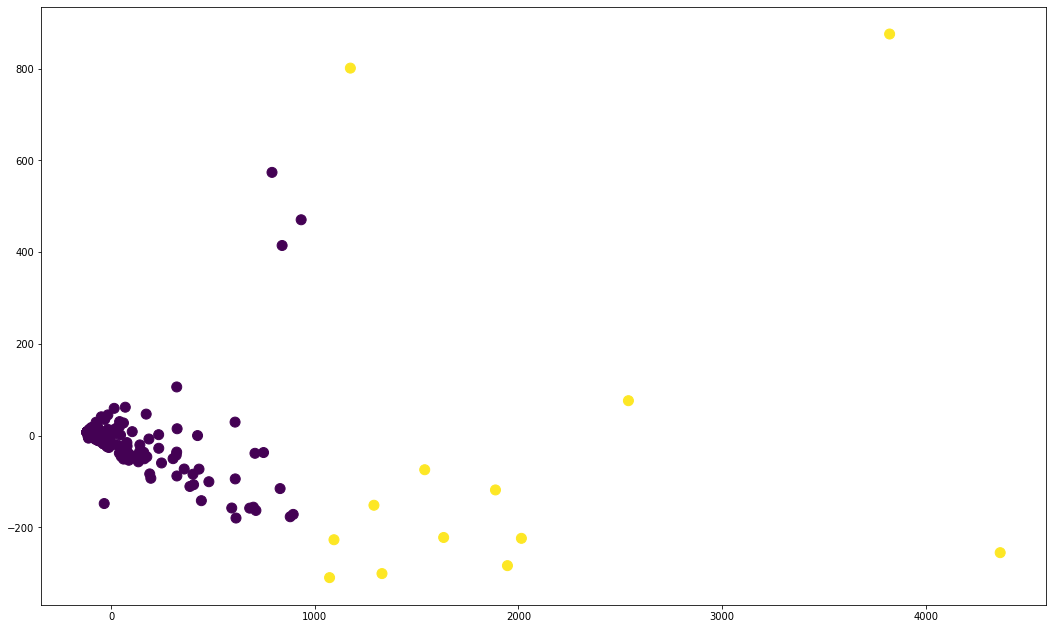

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.values)

df_pca = pd.DataFrame()

df_pca['1'] = pca_result[:,0]
df_pca['2'] = pca_result[:,1]

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(df_pca)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_pca['1'], df_pca['2'], c=kmeans.labels_, s=100)
plt.show()

Ya para finalizar con estos datos, vamos a probar los algoritmos anteriores, a ver si hay diferencias:

OPTICS, vamos a ver qué 'min_samples' usar y con qué métrica:

In [ ]:
eu = []
cos = []
man = []
mik = []
for i in range(2, 30):
  eu.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='euclidean').fit(df).labels_, metric='euclidean'),i))
  cos.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='cosine').fit(df).labels_, metric='euclidean'),i))
  man.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='cityblock').fit(df).labels_, metric='euclidean'),i))
  mik.append((metrics.silhouette_score(df, OPTICS(min_samples=i, metric='minkowski').fit(df).labels_, metric='euclidean'),i))
print(f'Euclídea: {max(eu)}')
print(f'Coseno: {max(cos)}')
print(f'Manhattan: {max(man)}')
print(f'Minkoski: {max(mik)}')

Euclídea: (0.10700210809997923, 2)
Coseno: (-0.0033650111196903633, 2)
Manhattan: (0.07583042060502629, 2)
Minkoski: (0.10700210809997923, 2)


Ya vemos que no obtenemos ningún resultado favorable.

Spectral Clustering:

In [ ]:
res = []
for i in range(2,25):
  res.append((metrics.silhouette_score(df, SpectralClustering(n_clusters=i, assign_labels="discretize", random_state=0).fit(df).labels_, metric='euclidean'),i))
print(f'n_clusters: {max(res)}')

n_clusters: (0.5325022802977498, 4)


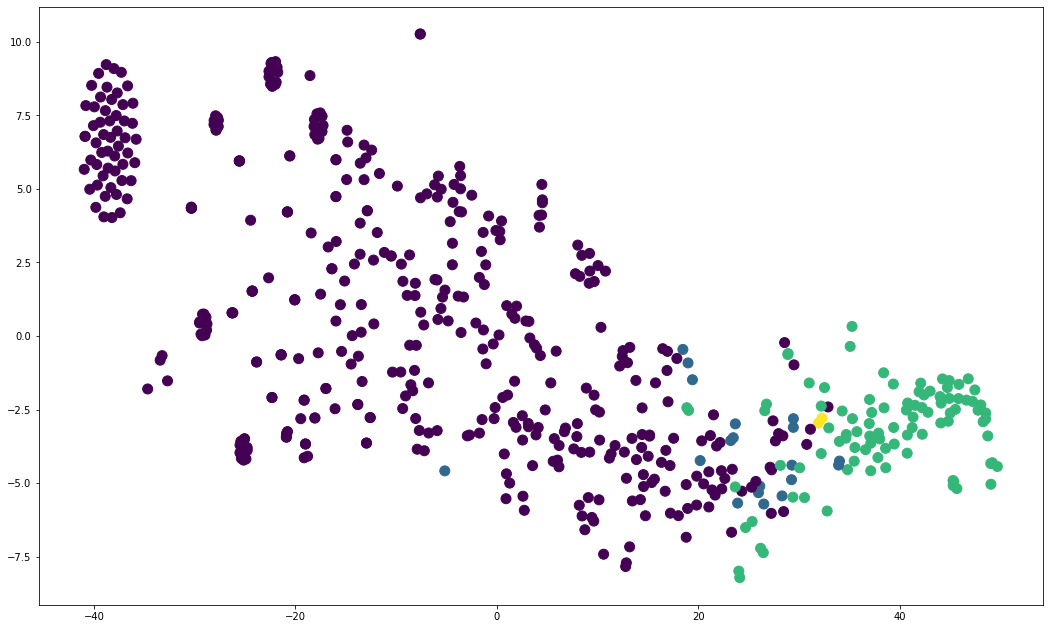

In [ ]:
from sklearn.manifold import TSNE

df_tsne = TSNE(learning_rate=50).fit_transform(df)

clustering = SpectralClustering(n_clusters=4, assign_labels="discretize").fit(df)
fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clustering.labels_, s=100)
plt.show()

Estos 4 grupos pueden resultar interesantes, pues realmente no solo hay arañas e insectos. Hay un grupo de Collembola que son muy similares a los insectos y el grupo de Myriapoda que también son parecidos a los insectos, y por sencillez los hemos agrupado como insectos. Pero vamos a comprobar si con estas 4 etiquetas los criterios externos mejoran.

In [ ]:
etiquetas = pd.read_csv('Etiquetas_Comp.csv', delimiter=';')
etiquetas.head(5)

,ID,Order,Clase
0,AR,Araneida,Arachnida
1,AC,Acari,Arachnida
2,BL,Blattaria,Insecta
3,CO,Coleoptera,Insecta
4,COL,Collembola,Collembola


In [ ]:
df_et = []
for i in range(1, 11):
  df_et.append(pd.read_csv('Combi_{0}_2011.csv'.format(i), delimiter=';',
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
  df_et.append(pd.read_csv('Pitfal_{0}_2011.csv'.format(i), delimiter=';', 
                        encoding= 'unicode_escape').fillna(0).iloc[:-1, :-1])
ids = df_et[0]['Morphotypes']
aux = []
for i in df_et:
  aux.append(i.iloc[:,1:])
df_et = aux
df_et = reduce(lambda a, b: a.add(b, fill_value=0), df_et)
df_et['ID'] = ids
df_et = df_et.iloc[: , 25:]
df_et['ID'] = df_et['ID'].str.split('.').str[0]
df_et
#Y ahora, dependiendo de qué codigo tenga necesitamos saber si es insecto o araña:
df_et = df_et.join(etiquetas.set_index('ID'), on='ID').drop('Order', axis=1)

df_et.Clase[df_et.Clase == 'Myriapoda'] = 3
df_et.Clase[df_et.Clase == 'Collembola'] = 2
df_et.Clase[df_et.Clase == 'Arachnida'] = 1
df_et.Clase[df_et.Clase == 'Insecta'] = 0

labels = df_et['Clase'].fillna(0).values

#Sacado del cuaderno 'tema4_03_CriteriosExternos.ipynb'
print("Medidas externas para Spectral Clustering con k=4:")
ars = metrics.adjusted_rand_score(labels, clustering.labels_)
fms = metrics.fowlkes_mallows_score(labels, clustering.labels_)
vm = metrics.v_measure_score(labels, clustering.labels_)
ami = metrics.adjusted_mutual_info_score(labels, clustering.labels_)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))

Medidas externas para Spectral Clustering con k=4:
Índice de Rand ajustado: 0.10200744380227578
Índice de Falkes-Mallow: 0.8929577246203879
V-medida: 0.1579564873471746
AMI: 0.15275305946891593


Pues podemos comprobar que no, esos grupos conseguidos no corresponden con las clases que nosotros tenemos.

Por último parece interesante ya que son especies taxonómicas agrupar por dendogramas, vamos a realizarlo con la distancias del coseno para relativizar las apariciones que encontramos. Así como se hace con el tratamiento de texto a ver qué sale:

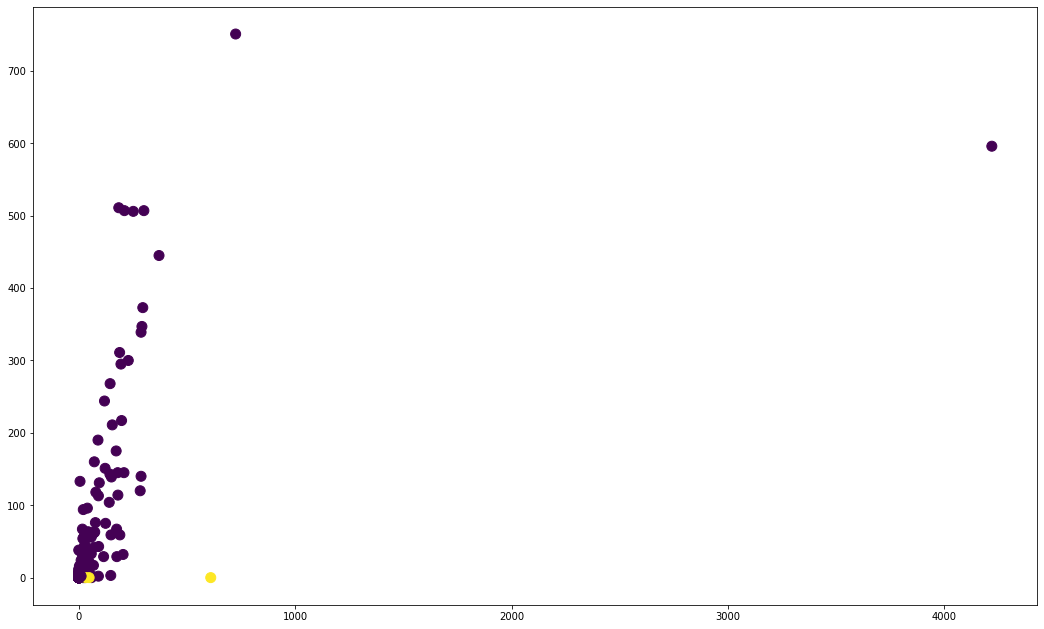

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(affinity='cosine', linkage='average').fit(df)

fig, ax = plt.subplots(figsize=(18, 11))
plt.scatter(df['02'], df['01'], c=clustering.labels_, s=100)
plt.show()

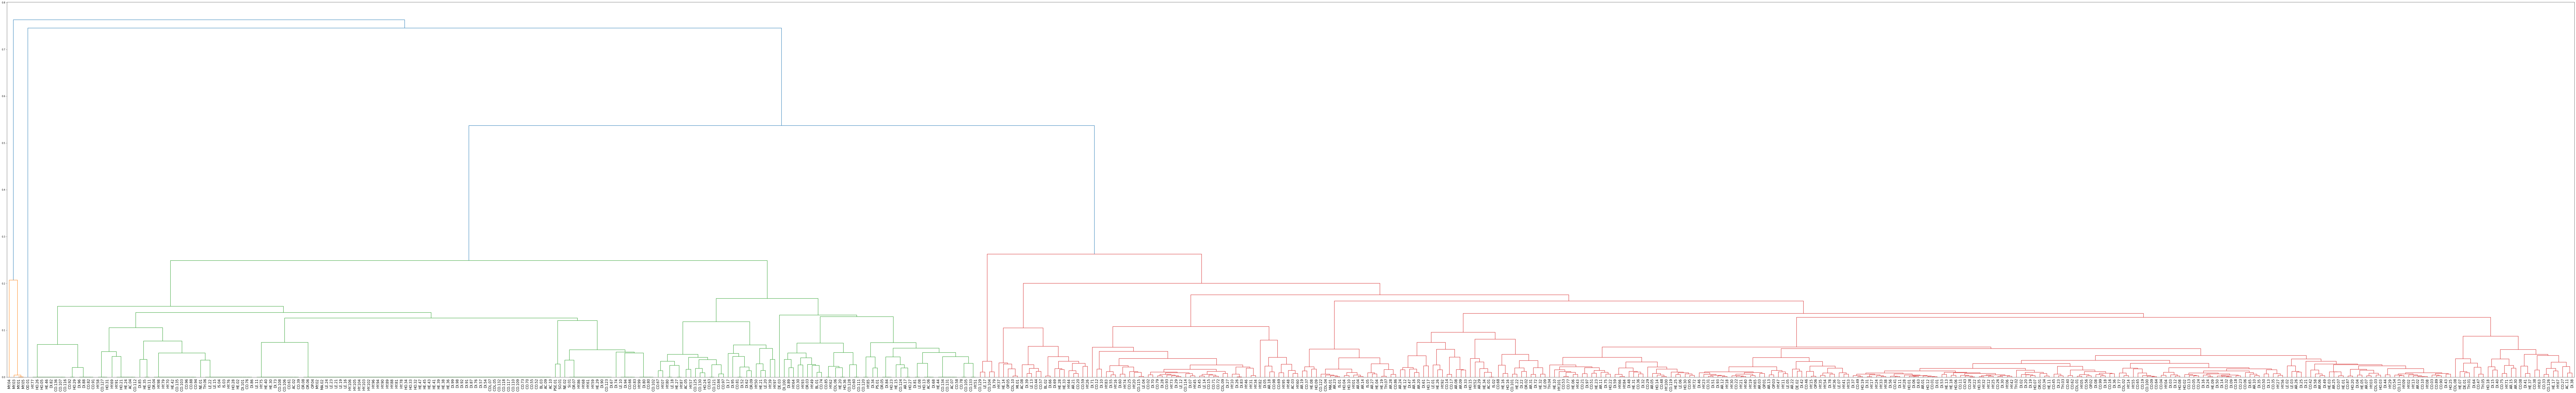

In [ ]:
import scipy.cluster.hierarchy as sch

enlace = sch.linkage(df, method='average', metric='cosine')
plt.subplots(figsize=(200, 30))

dendograma = sch.dendrogram(enlace, labels=ids.values, leaf_font_size=15)

Vemos que el dendograma es realmente interesante, y practicamente todos los Myriapoda que son una clase a parte, los ha separado del resto, cosa que tiene buena pinta. Por hacer una prueba más allá vamos a agrupar todos los datos por orden taxonómico y volver a calcular el dendograma:

In [ ]:
ids = ids.str.split('.').str[0]
df['CL'] = ids
df = df.groupby('CL').sum()
df.reset_index(inplace=True)
df

,CL,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,TOTAL,01,02,03,04,05
0,AC,11.0,11.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,11.0,11.0,11.0,38,7.0,11.0,12.0,3.0,5.0
1,AR,31.0,29.0,27.0,21.0,22.0,29.0,27.0,25.0,25.0,25.0,28.0,27.0,1126,178.0,525.0,145.0,150.0,128.0
2,BL,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,1.0,1.0,1.0,6.0,1.0
3,CO,126.0,136.0,123.0,125.0,124.0,127.0,131.0,123.0,128.0,129.0,131.0,122.0,27432,4410.0,3919.0,4027.0,4009.0,11067.0
4,COL,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,384,35.0,139.0,84.0,95.0,31.0
5,DE,3.0,3.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,80,10.0,5.0,41.0,13.0,11.0
6,DI,90.0,100.0,92.0,91.0,94.0,98.0,93.0,92.0,95.0,97.0,91.0,95.0,23632,4776.0,3647.0,4244.0,4176.0,6789.0
7,HE,45.0,47.0,47.0,43.0,41.0,43.0,44.0,41.0,41.0,46.0,46.0,43.0,809,185.0,208.0,197.0,172.0,47.0
8,HO,33.0,35.0,33.0,31.0,30.0,34.0,33.0,31.0,32.0,33.0,32.0,31.0,2363,478.0,539.0,599.0,387.0,360.0
9,HY,99.0,104.0,100.0,98.0,98.0,94.0,99.0,100.0,95.0,100.0,96.0,98.0,15222,2056.0,6140.0,2321.0,2199.0,2506.0


In [ ]:
df = df.drop('TOTAL', axis = 1)

In [ ]:
df.S01[df.S01 > 0] = 1
df.S02[df.S02 > 0] = 1
df.S03[df.S03 > 0] = 1
df.S04[df.S04 > 0] = 1
df.S05[df.S05 > 0] = 1
df.S06[df.S06 > 0] = 1
df.S07[df.S07 > 0] = 1
df.S08[df.S08 > 0] = 1
df.S09[df.S09 > 0] = 1
df.S10[df.S10 > 0] = 1
df.Comb[df.Comb > 0] = 1
df.Pit[df.Pit > 0] = 1
df

,CL,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,01,02,03,04,05
0,AC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,11.0,12.0,3.0,5.0
1,AR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,178.0,525.0,145.0,150.0,128.0
2,BL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0
3,CO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4410.0,3919.0,4027.0,4009.0,11067.0
4,COL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0,139.0,84.0,95.0,31.0
5,DE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,41.0,13.0,11.0
6,DI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4776.0,3647.0,4244.0,4176.0,6789.0
7,HE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,185.0,208.0,197.0,172.0,47.0
8,HO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,478.0,539.0,599.0,387.0,360.0
9,HY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2056.0,6140.0,2321.0,2199.0,2506.0


In [ ]:
ids = df['CL']
df = df.drop('CL', axis=1)
df

,Comb,Pit,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,01,02,03,04,05
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,11.0,12.0,3.0,5.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,178.0,525.0,145.0,150.0,128.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4410.0,3919.0,4027.0,4009.0,11067.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35.0,139.0,84.0,95.0,31.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,5.0,41.0,13.0,11.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4776.0,3647.0,4244.0,4176.0,6789.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,185.0,208.0,197.0,172.0,47.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,478.0,539.0,599.0,387.0,360.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2056.0,6140.0,2321.0,2199.0,2506.0


In [ ]:
df = df.iloc[:,12:]

In [ ]:
df

,01,02,03,04,05
0,7.0,11.0,12.0,3.0,5.0
1,178.0,525.0,145.0,150.0,128.0
2,1.0,1.0,1.0,6.0,1.0
3,4410.0,3919.0,4027.0,4009.0,11067.0
4,35.0,139.0,84.0,95.0,31.0
5,10.0,5.0,41.0,13.0,11.0
6,4776.0,3647.0,4244.0,4176.0,6789.0
7,185.0,208.0,197.0,172.0,47.0
8,478.0,539.0,599.0,387.0,360.0
9,2056.0,6140.0,2321.0,2199.0,2506.0


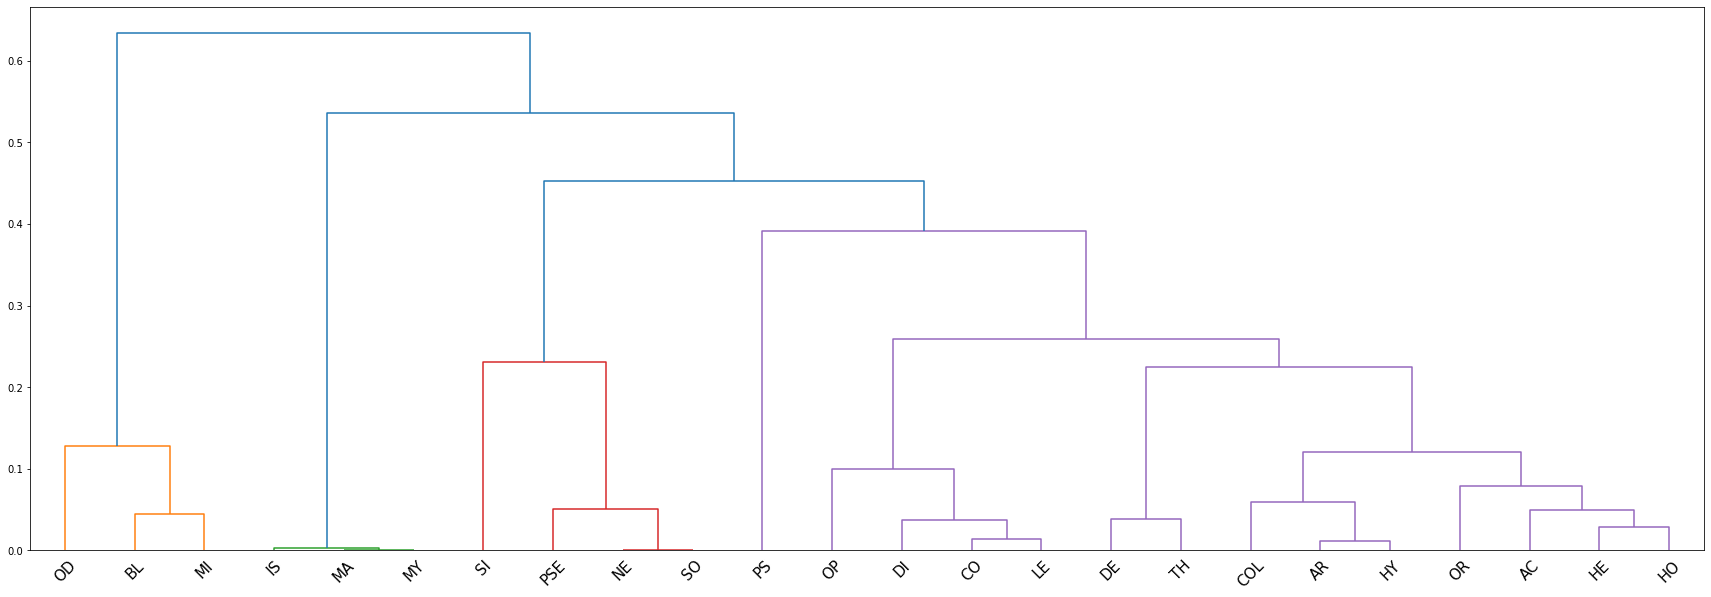

In [ ]:
enlace = sch.linkage(df, method='average', metric='cosine')
plt.subplots(figsize=(30, 10))

dendograma = sch.dendrogram(enlace, labels=ids.values, leaf_font_size=15)

Sale algo vistoso también, pero no termina de tener demasiado sentido. Por lo menos referente al orden taxonómico. Igual un biólogo podría encontrar características comunes y dotarle de un significado.

Así que quedándonos con el anterior dendograma y viendo que tiene algo más de sentido. Podemos determinar que con más datos, quizá datos biométricos sobre los insectos recogidos, si que tendría total sentido aplicar clustering. Y sobre todo, que quizá algún experto en este tema, viendo el dendograma, pueda determinar que existe algún tipo de relación entre lo que nos dice el dendograma y la biología.

Hecho todo esto, vamos a terminar este apartado y centrarnos en Spectral Clustering.

# 2. Spectral Clustering

El objetivo de esta segunda parte es profundizar en este algoritmo y probarlo en un dataset que sí nos permita hacer clustering.

## Explicación del algoritmo

Este algoritmo de aprendizaje no supervisado hace uso del espectro (conjunto de valores propios) de la matriz construida apartir del grafo del conjunto de datos.
<br>
<br>
Recordemos el calculo de los valores propios:

quicklatex.com-2a92405160ef5c48afcfbca424f87884_l3.webp
<br>
<br>
Donde A es nuestra matriz de similitud sacada a apartir del grafo de nuestros datos, por lo tanto, siempre será cuadrada. Y lo que buscamos es λ, que son los valores propios de dicha matriz.
<br>
<br>
Y recordemos que un grafo es una representación de nuestros datos, dado un conjunto de nodos y sus correspondientes relaciones.
<br>
<br>
Para representar un grafo, tenemos varias formas, como por ejemplo la matriz de adyacencia. Pero en este caso, nos interesa la matriz laplaciana. Una manera de calcular esta matriz es: a la matriz cuyos valores de la diagonal son los grados de los nodos de nuestro grafo le restamos la matriz de adyacencia. Siguendo la siguiente fórmula:
<br>
<br>
0cb1fbbbf7819fa84d4f0b1cad18620b08f0c2e9.svg

<br>
<br>
Donde cada v representa los nodos de nuestro grafo.


Una vez tenemos la matriz laplaciana, calculamos sus valores propios y estos nos diran como de separados o relacionados están los nodos de nuestro grafo y en qué grupos. Y por último se suele aplicar un algoritmo de clustering como KMeans para conseguir las etiquetas y definir los clusters.

##Ventajas y Desventajas

###Ventajas

En general este algoritmo es útil para casos en los que no sabemos qué forma tienen nuestros datos, tenemos muchas columnas o columnas con valores categoricos. Ya que recordemos que en nuestro grafo los nodos se conectan por similitud, pero esa similitud no tiene por qué ser una distancia, sino la relación que se determine entre los nodos del grafo.

###Desventajas

Es un algoritmo muy lento, por lo que si tenemos muchas filas tardará mucho en calcular los resultados. Además, como sucede con otros algoritmos, necesitamos decirle el número de clusters a calcular.
<br>
<br>
También, como hemos visto en la explicación, necesita hacer uso de KMeans, por lo tanto, es sensible a la inicialización y puede devolvernos resultados diferentes de los mismos datos.
<br>
<br>
Por último, no es un algoritmo demasiado sencillo ni intuitivo de comprender. Y por tanto, no parece útil si lo que queremos es es explicar los resultados o utilizarlo para mostrarselo a alguien que no tenga la base matemática necesaria.

##Ejemplo

En este caso vamos a coger un dataset en el que poder aplicar este algoritmo y ver un ejemplo.

In [130]:
df = pd.read_csv('Pokemon.csv')
df.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


Vemos que las megas utilizan los mismos numeros que el pokemon original, vamos a eliminarlas:

In [131]:
df = df.drop_duplicates(subset=['number'], keep='first')
df.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


También vemos que si no tiene un segundo tipo aparece como NaN, entonces podemos ponerle un valor por defecto o eliminar esta segunda columna. Vamos a rellenarlo por 'NoType'.

In [132]:
df = df.fillna('NoType')
df.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
5,4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,NoType,405,58,64,58,80,65,80,1,False


Hacemos variables dummy, y eliminamos las que no son relevantes, como el nombre o la generación:

In [133]:
from sklearn.preprocessing import OneHotEncoder

df['legendary'] = df['legendary'].astype(int)
dummies = pd.get_dummies(df.type2)
merged = pd.concat([df, dummies], axis=1)
name = df['name']
merged = merged.drop(['name', 'type1', 'type2', 'generation'], axis=1)
merged.head(5)

,number,total,hp,attack,defense,sp_attack,sp_defense,speed,legendary,Bug,...,Grass,Ground,Ice,NoType,Normal,Poison,Psychic,Rock,Steel,Water
0,1,318,45,49,49,65,65,45,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,405,60,62,63,80,80,60,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,525,80,82,83,100,100,80,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4,309,39,52,43,60,50,65,0,0,...,0,0,0,1,0,0,0,0,0,0
6,5,405,58,64,58,80,65,80,0,0,...,0,0,0,1,0,0,0,0,0,0


Vamos a normalizar y proyectar:

In [93]:
from sklearn.preprocessing import StandardScaler, normalize 
df = merged
#Normalizamos: 
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df)
df_norm = normalize(df_scaled)
df_norm = pd.DataFrame(df_norm) 

#Proyectamos:
pca = PCA(n_components = 2) 
df_pca = pca.fit_transform(df_norm) 
df_pca = pd.DataFrame(df_pca) 
df_pca.columns = ['P1', 'P2'] 
  
df_pca.head(2) 

,P1,P2
0,0.204767,0.354867
1,-0.034008,0.301508


Visualizamos los datos:


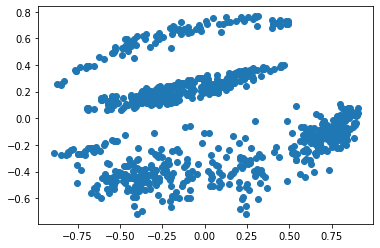

In [98]:
plt.scatter(df_pca['P1'], df_pca['P2'], cmap =plt.cm.winter) 
plt.show() 

RFB:

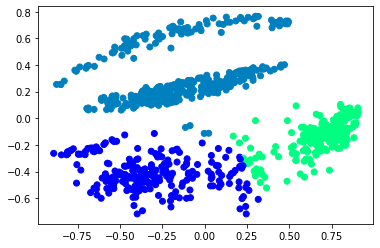

In [97]:
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(df_pca)

plt.scatter(df_pca['P1'], df_pca['P2'], c = labels_rbf, cmap =plt.cm.winter) 
plt.show() 

nearest_neighbors:

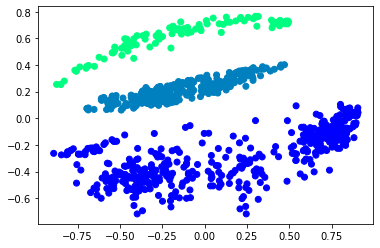

In [171]:
spectral_model_nn = SpectralClustering(n_clusters = 3, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(df_pca)

plt.scatter(df_pca['P1'], df_pca['P2'], c = labels_nn, cmap =plt.cm.winter) 
plt.show() 

¿Qué significan estos grupos? Eso habrá que verlo.

Vamos a aplicar un bucle para encontrar el k óptimo:


In [122]:
import warnings
warnings.filterwarnings("ignore")

res = []
for i in range(2, 25):
  for j in range(4,12):
    res.append((metrics.silhouette_score(df_pca, SpectralClustering(n_clusters = i, affinity ='nearest_neighbors', n_neighbors=j).fit(df_pca).labels_, metric='euclidean'),i, j))
print(f'Silueta: {max(res)}')

Silueta: (0.5224486271115629, 6, 8)


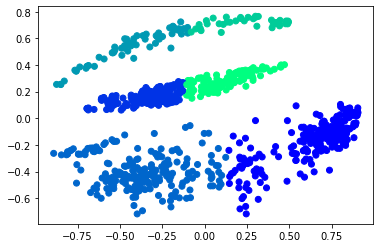

In [147]:
spectral_model_nn = SpectralClustering(n_clusters = 6, affinity ='nearest_neighbors', n_neighbors=8)
labels_nn = spectral_model_nn.fit_predict(df_pca)

plt.scatter(df_pca['P1'], df_pca['P2'], c = labels_nn, cmap =plt.cm.winter) 
plt.show() 

Criterios internos:

In [124]:
#Criterios internos:
print("Medidas internas para SpectralClustering con min_samples=3:")
ss = metrics.silhouette_score(df_pca, labels_nn, metric='euclidean')
ch = metrics.calinski_harabasz_score(df_pca, labels_nn)
db = metrics.davies_bouldin_score(df_pca, labels_nn)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para SpectralClustering con min_samples=3:
Coef. de silueta: 0.5224486271115629
Coef. de Calinski-Harabasz: 1051.431168828386
Coef. de Davies-Bouldin: 0.6823509148152933


Vemos que no está nada mal el resultado. Aunque viendo la visualización vemos que los grupos son un poco extraños. Por eso, vamos a utilizar k=3 y tratar de ver por qué esos grupos.

In [142]:
df = pd.read_csv('Pokemon.csv')
df = df.drop_duplicates(subset=['number'], keep='first')
df = df.fillna('NoType')
df['legendary'] = df['legendary'].astype(int)
df['label'] = labels_nn
df['name'] = name
df.head(5)

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,label
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,1
5,4,Charmander,Fire,NoType,309,39,52,43,60,50,65,1,0,0
6,5,Charmeleon,Fire,NoType,405,58,64,58,80,65,80,1,0,0


In [143]:
print(df[df.label == 0].describe())
print(df[df.label == 1].describe())
print(df[df.label == 2].describe())

           number       total          hp      attack     defense   sp_attack  \
count  456.000000  456.000000  456.000000  456.000000  456.000000  456.000000   
mean   435.813596  404.888158   67.370614   73.938596   67.026316   65.870614   
std    259.059199  111.513142   27.990123   29.606662   27.125823   28.718236   
min      4.000000  175.000000   10.000000    5.000000    5.000000   10.000000   
25%    208.250000  309.000000   50.000000   52.000000   48.000000   43.750000   
50%    430.000000  405.000000   65.000000   70.000000   62.000000   60.000000   
75%    651.500000  490.000000   78.250000   95.000000   82.250000   85.000000   
max    897.000000  720.000000  255.000000  165.000000  200.000000  173.000000   

       sp_defense       speed  generation   legendary  label  
count  456.000000  456.000000  456.000000  456.000000  456.0  
mean    66.697368   63.984649    4.030702    0.078947    0.0  
std     26.429431   28.976265    2.285920    0.269953    0.0  
min     20.000000 

Vemos que el primer grupo cuenta con 456 pokémon, el segundo con 347 y el último con 95. Qué todos los grupos tienen legendarios, aunque el primero menos que el resto.
<br>
<br>
Y viendo las estadísticas comprobamos que en general, el primer grupo son muchos pokemons pero con estadísticas bajas, el segundo son menos pero sus estadísticas son muy buenas y el tercero como son pocos están parecidos al segundo grupo, pero tienen mucha velocidad.

¿Qué pasa si hacemos lo mismo pero con las etiquetas de k = 6?

In [148]:
df['label'] = labels_nn
print(df[df.label == 0].describe())
print(df[df.label == 1].describe())
print(df[df.label == 2].describe())
print(df[df.label == 3].describe())
print(df[df.label == 4].describe())
print(df[df.label == 5].describe())

           number       total          hp      attack     defense   sp_attack  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean   401.292887  314.887029   52.213389   56.761506   52.585774   50.380753   
std    254.304237   59.150639   15.465891   20.051971   17.773551   18.779834   
min      4.000000  175.000000   10.000000    5.000000    5.000000   10.000000   
25%    177.000000  282.500000   42.000000   45.000000   40.000000   40.000000   
50%    388.000000  310.000000   50.000000   55.000000   50.000000   50.000000   
75%    604.000000  352.500000   60.000000   70.000000   62.000000   62.000000   
max    878.000000  420.000000  130.000000  125.000000  135.000000  125.000000   

       sp_defense       speed  generation   legendary  label  
count  239.000000  239.000000  239.000000  239.000000  239.0  
mean    50.556485   52.389121    3.820084    0.008368    0.0  
std     15.022810   21.782231    2.218395    0.091285    0.0  
min     20.000000 

Ya en estos seis grupos vemos como salen 3 grupos de pokémons poderosos, y 3 grupos de pokemons más débiles, basándonos en el total de sus estadisticas. Casi pareciera que hay dos grupos en realidad, el de los pokemons poderosos y el de los débiles, además de cambios entres los grupos por temas como la velocidad, la defensa o el ataque que hay grupos que destacan más.

In [158]:
#Vamos a verlo por tipos:
print("Grupo 1: "+'\n'+"Tipo 1: "+str(df[df.label == 0]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 0]['type2'].describe().top))
print("Grupo 2: "+'\n'+"Tipo 1: "+str(df[df.label == 1]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 1]['type2'].describe().top))
print("Grupo 3: "+'\n'+"Tipo 1: "+str(df[df.label == 2]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 2]['type2'].describe().top))
print("Grupo 4: "+'\n'+"Tipo 1: "+str(df[df.label == 3]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 3]['type2'].describe().top))
print("Grupo 5: "+'\n'+"Tipo 1: "+str(df[df.label == 4]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 4]['type2'].describe().top))
print("Grupo 6: "+'\n'+"Tipo 1: "+str(df[df.label == 5]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 5]['type2'].describe().top))

Grupo 1: 
Tipo 1: Water
Tipo 2: NoType
Grupo 2: 
Tipo 1: Water
Tipo 2: Psychic
Grupo 3: 
Tipo 1: Normal
Tipo 2: NoType
Grupo 4: 
Tipo 1: Normal
Tipo 2: Flying
Grupo 5: 
Tipo 1: Normal
Tipo 2: Flying
Grupo 6: 
Tipo 1: Bug
Tipo 2: Poison


In [165]:
for i in range(6):
  print("Grupo " + str(i)+":"+'\n')
  print("Tipo: " + str(df[df.label == i]['type1'].describe().top))
  print("Ataque: " + str(df[df.label == i]['attack'].mean()))
  print("Defensa: " + str(df[df.label == i]['defense'].mean()))
  print("Ataque Especial: " + str(df[df.label == i]['sp_attack'].mean()))
  print("Defensa Especial: " + str(df[df.label == i]['sp_defense'].mean()))
  print("Velocidad: " + str(df[df.label == i]['speed'].mean())+'\n')

Grupo 0:

Tipo: Water
Ataque: 56.76150627615063
Defensa: 52.58577405857741
Ataque Especial: 50.38075313807531
Defensa Especial: 50.55648535564853
Velocidad: 52.38912133891213

Grupo 1:

Tipo: Water
Ataque: 94.51415094339623
Defensa: 91.43396226415095
Ataque Especial: 88.29716981132076
Defensa Especial: 86.10377358490567
Velocidad: 74.0

Grupo 2:

Tipo: Normal
Ataque: 92.85714285714286
Defensa: 82.93087557603687
Ataque Especial: 82.93087557603687
Defensa Especial: 84.47465437788019
Velocidad: 76.7557603686636

Grupo 3:

Tipo: Normal
Ataque: 88.84482758620689
Defensa: 78.93103448275862
Ataque Especial: 83.1896551724138
Defensa Especial: 80.32758620689656
Velocidad: 90.1896551724138

Grupo 4:

Tipo: Normal
Ataque: 56.32432432432432
Defensa: 45.16216216216216
Ataque Especial: 49.648648648648646
Defensa Especial: 50.86486486486486
Velocidad: 66.91891891891892

Grupo 5:

Tipo: Bug
Ataque: 57.49629629629629
Defensa: 60.01481481481481
Ataque Especial: 52.85925925925926
Defensa Especial: 54.481

Vemos que los grupos son de agua y normal, lógico siendo los tipos que más frecuencia tienen en el juego. O normal volador, ya que en todas las generaciones se introduce por lo menos una cadena evolutiva de pokemons normal volador.

Volvemos a k=3 a ver qué encontramos:

In [172]:
df['label'] = labels_nn
print("Grupo 1: "+'\n'+"Tipo 1: "+str(df[df.label == 0]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 0]['type2'].describe().top))
print("Grupo 2: "+'\n'+"Tipo 1: "+str(df[df.label == 1]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 1]['type2'].describe().top))
print("Grupo 3: "+'\n'+"Tipo 1: "+str(df[df.label == 2]['type1'].describe().top) + '\n'+ "Tipo 2: " + str(df[df.label == 2]['type2'].describe().top))

Grupo 1: 
Tipo 1: Normal
Tipo 2: NoType
Grupo 2: 
Tipo 1: Water
Tipo 2: Poison
Grupo 3: 
Tipo 1: Normal
Tipo 2: Flying


In [173]:
for i in range(3):
  print("Grupo " + str(i)+":"+'\n')
  print("Tipo: " + str(df[df.label == i]['type1'].describe().top))
  print("Ataque: " + str(df[df.label == i]['attack'].mean()))
  print("Defensa: " + str(df[df.label == i]['defense'].mean()))
  print("Ataque Especial: " + str(df[df.label == i]['sp_attack'].mean()))
  print("Defensa Especial: " + str(df[df.label == i]['sp_defense'].mean()))
  print("Velocidad: " + str(df[df.label == i]['speed'].mean())+'\n')

Grupo 0:

Tipo: Normal
Ataque: 73.93859649122807
Defensa: 67.02631578947368
Ataque Especial: 65.87061403508773
Defensa Especial: 66.69736842105263
Velocidad: 63.98464912280702

Grupo 1:

Tipo: Water
Ataque: 80.11239193083574
Defensa: 79.21037463976946
Ataque Especial: 74.51008645533142
Defensa Especial: 73.80115273775216
Velocidad: 64.19020172910663

Grupo 2:

Tipo: Normal
Ataque: 76.17894736842105
Defensa: 65.77894736842106
Ataque Especial: 70.12631578947368
Defensa Especial: 68.85263157894737
Velocidad: 81.12631578947368



Vamos a hacer una última prueba, vamos a agrupar con k igual al número de tipos, a ver qué encontramos:

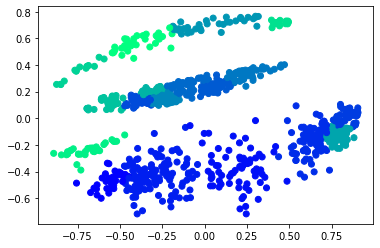

In [174]:
spectral_model_nn = SpectralClustering(n_clusters = 18, affinity ='nearest_neighbors', n_neighbors=8)
labels_nn = spectral_model_nn.fit_predict(df_pca)

plt.scatter(df_pca['P1'], df_pca['P2'], c = labels_nn, cmap =plt.cm.winter) 
plt.show() 

In [177]:
df['label'] = labels_nn
for i in range(18):
  print("Grupo " + str(i)+":")
  print("Tipo: " + str(df[df.label == i]['type1'].describe().top)+'\n')

Grupo 0:
Tipo: Grass

Grupo 1:
Tipo: Water

Grupo 2:
Tipo: Normal

Grupo 3:
Tipo: Water

Grupo 4:
Tipo: Bug

Grupo 5:
Tipo: Water

Grupo 6:
Tipo: Rock

Grupo 7:
Tipo: Bug

Grupo 8:
Tipo: Bug

Grupo 9:
Tipo: Water

Grupo 10:
Tipo: Normal

Grupo 11:
Tipo: Water

Grupo 12:
Tipo: Water

Grupo 13:
Tipo: Dragon

Grupo 14:
Tipo: Dragon

Grupo 15:
Tipo: Normal

Grupo 16:
Tipo: Psychic

Grupo 17:
Tipo: Normal



Ya solo por curiosidad, el grupo 14 que tiene tipo dragon debería ser más poderoso que el grupo 15 que tiene tipo normal:

In [178]:
  print("Grupo Dragon")
  print("Tipo: " + str(df[df.label == 14]['type1'].describe().top))
  print("Ataque: " + str(df[df.label == 14]['attack'].mean()))
  print("Defensa: " + str(df[df.label == 14]['defense'].mean()))
  print("Ataque Especial: " + str(df[df.label == 14]['sp_attack'].mean()))
  print("Defensa Especial: " + str(df[df.label == 14]['sp_defense'].mean()))
  print("Velocidad: " + str(df[df.label == 14]['speed'].mean())+'\n')
  print("Grupo Normal:")
  print("Tipo: " + str(df[df.label == 15]['type1'].describe().top))
  print("Ataque: " + str(df[df.label == 15]['attack'].mean()))
  print("Defensa: " + str(df[df.label == 15]['defense'].mean()))
  print("Ataque Especial: " + str(df[df.label == 15]['sp_attack'].mean()))
  print("Defensa Especial: " + str(df[df.label == 15]['sp_defense'].mean()))
  print("Velocidad: " + str(df[df.label == 15]['speed'].mean())+'\n')

Grupo Dragon
Tipo: Dragon
Ataque: 113.4
Defensa: 90.46666666666667
Ataque Especial: 111.66666666666667
Defensa Especial: 101.13333333333334
Velocidad: 92.86666666666666

Grupo Normal:
Tipo: Normal
Ataque: 45.0
Defensa: 35.38461538461539
Ataque Especial: 35.23076923076923
Defensa Especial: 40.53846153846154
Velocidad: 62.0



Y así es, así que podemos concluir, que los datos no son sencillos de interpretar, pero tampoco imposibles y algo si que agrupa en función de lo poderoso que sea o no el pokemon. Ya lo último, vamos a ver qué resultados obtenemos sin normalizar ni proyectar, no los podremos ver pero con las métricas nos haremos una idea:

In [179]:
df = pd.read_csv('Pokemon.csv')
df = df.drop_duplicates(subset=['number'], keep='first')
df = df.fillna('NoType')
df['legendary'] = df['legendary'].astype(int)
dummies = pd.get_dummies(df.type2)
merged = pd.concat([df, dummies], axis=1)
name = df['name']
merged = merged.drop(['name', 'type1', 'type2', 'generation'], axis=1)
df = merged

res = []
for i in range(2, 25):
  for j in range(4,12):
    res.append((metrics.silhouette_score(df, SpectralClustering(n_clusters = i, affinity ='nearest_neighbors', n_neighbors=j).fit(df).labels_, metric='euclidean'),i, j))
print(f'Silueta: {max(res)}')

Silueta: (0.47534206421537445, 2, 11)


In [180]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors', n_neighbors=11)
labels_nn = spectral_model_nn.fit_predict(df)

print("Medidas internas para SpectralClustering:")
ss = metrics.silhouette_score(df, labels_nn, metric='euclidean')
ch = metrics.calinski_harabasz_score(df, labels_nn)
db = metrics.davies_bouldin_score(df, labels_nn)

print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para SpectralClustering:
Coef. de silueta: 0.47534206421537445
Coef. de Calinski-Harabasz: 1300.5476270960062
Coef. de Davies-Bouldin: 0.7729359108208432


In [181]:
df = pd.read_csv('Pokemon.csv')
df = df.drop_duplicates(subset=['number'], keep='first')
df = df.fillna('NoType')
df['legendary'] = df['legendary'].astype(int)
df['label'] = labels_nn
df['name'] = name
print(df[df.label == 0].describe())
print(df[df.label == 1].describe())

           number       total          hp      attack     defense   sp_attack  \
count  491.000000  491.000000  491.000000  491.000000  491.000000  491.000000   
mean   246.067210  413.668024   67.751527   73.572301   70.085540   67.892057   
std    141.997807  112.137242   27.685762   29.265016   30.827843   28.600888   
min      1.000000  180.000000    1.000000    5.000000    5.000000   10.000000   
25%    123.500000  320.000000   50.000000   50.000000   49.000000   45.000000   
50%    246.000000  415.000000   65.000000   72.000000   65.000000   65.000000   
75%    368.500000  499.000000   80.000000   91.500000   85.500000   90.000000   
max    494.000000  720.000000  255.000000  165.000000  230.000000  154.000000   

       sp_defense       speed  generation   legendary  label  
count  491.000000  491.000000  491.000000  491.000000  491.0  
mean    69.130346   65.287169    2.397149    0.071283    0.0  
std     27.999477   27.147162    1.137089    0.257560    0.0  
min     20.000000 

No sacamos ningún resultado importante.

##Bibliografía

Spectral Clustering por William Fleshman: https://towardsdatascience.com/spectral-clustering-aba2640c0d5b#:~:text=Spectral%20clustering%20is%20a%20technique,non%20graph%20data%20as%20well.